# The Spark Foundation - GRIP - Data Science & Business Analytics

# January 2022

# Task(2) : Prediction Using Unspervised Learning 

# Name : Ahmed Emara

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram ,linkage

In [2]:
PATH = '/content/Iris.csv'

In [3]:
df = pd.read_csv(PATH)

In [4]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## 1- K-Means Clustring

In [12]:
iris = df.drop(['Id'] ,axis = 1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


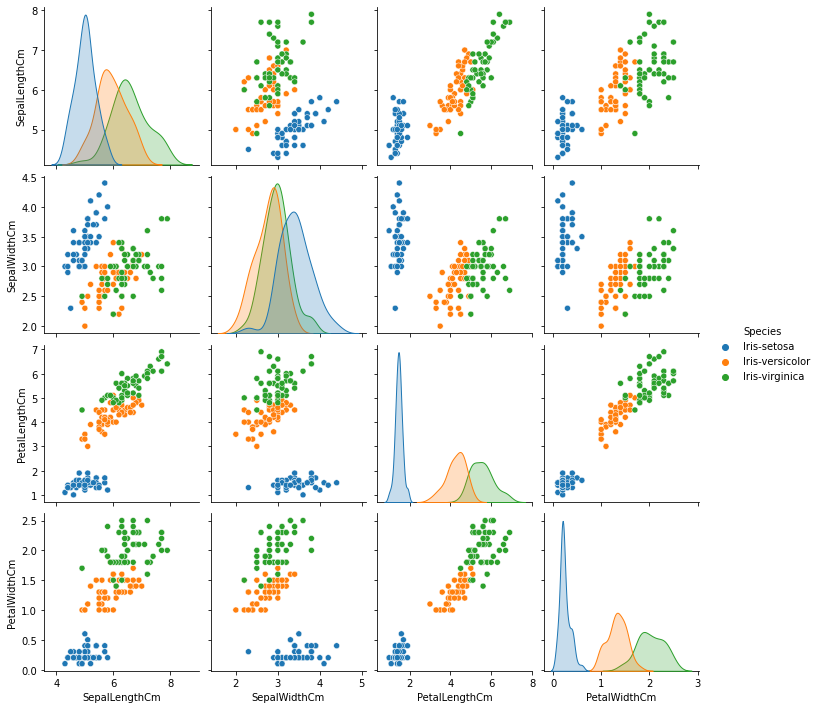

In [9]:
sns.pairplot(data = iris ,hue = 'Species')
plt.show()

### We see that that the thress species are seperable specially in Iris-setosa, We can see them are easily separable from the other two species .

### We will not tell the model that there are an optimal number of clusters of three instead we will drop the labels columns, and train on the data to find that number .

In [13]:
features = iris.drop(['Species'] ,axis = 1)
features

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## - The Elbow Rule : For knowing the optimum number of clusters 

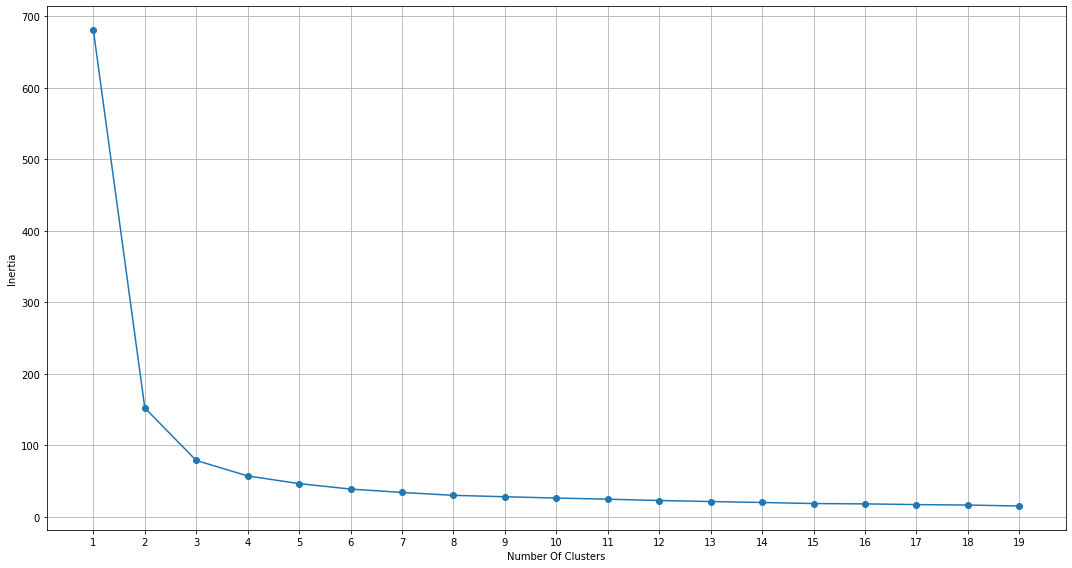

In [19]:
inertia = []
for i in range(1 ,20) :
  km = KMeans(n_clusters=i)
  km.fit(features)
  inertia.append(km.inertia_)
plt.figure(figsize=(15 ,8))
plt.plot(range(1 ,20) ,inertia ,'-o')
plt.grid(True)
plt.xlabel('Number Of Clusters')
plt.ylabel('Inertia') 
plt.xticks(range(1 ,20))
plt.tight_layout()
plt.show()

### So (2 ,3) both seem to be good values

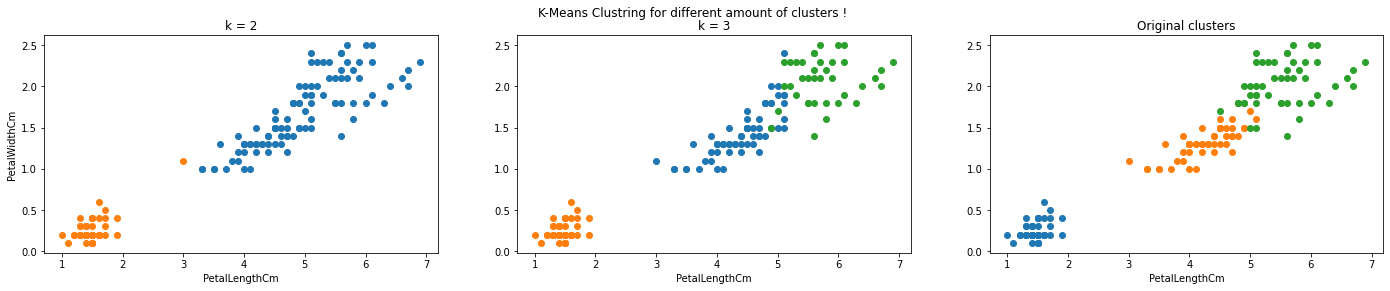

In [22]:
plt.figure(figsize=(24,4))
plt.suptitle('K-Means Clustring for different amount of clusters !')

plt.subplot(1 ,3 ,1)
plt.title('k = 2')
km = KMeans(n_clusters=2)
features['Labels'] = km.fit_predict(features)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.scatter(features.PetalLengthCm[features.Labels == 0] ,features.PetalWidthCm[features.Labels == 0])
plt.scatter(features.PetalLengthCm[features.Labels == 1] ,features.PetalWidthCm[features.Labels == 1])

plt.subplot(1 ,3 ,2)
plt.title('k = 3')
plt.xlabel('PetalLengthCm')
km = KMeans(n_clusters=3)
features.drop(['Labels'] ,axis = 1)
features['Labels'] = km.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.Labels == 0] ,features.PetalWidthCm[features.Labels == 0])
plt.scatter(features.PetalLengthCm[features.Labels == 1] ,features.PetalWidthCm[features.Labels == 1])
plt.scatter(features.PetalLengthCm[features.Labels == 2] ,features.PetalWidthCm[features.Labels == 2])

plt.subplot(1 ,3 ,3) 
plt.title('Original clusters')
plt.xlabel('PetalLengthCm')
features.drop(['Labels'] ,axis = 1)
plt.scatter(df.PetalLengthCm[df.Species == "Iris-setosa"],df.PetalWidthCm[df.Species == "Iris-setosa"])
plt.scatter(df.PetalLengthCm[df.Species == "Iris-versicolor"],df.PetalWidthCm[df.Species == "Iris-versicolor"])
plt.scatter(df.PetalLengthCm[df.Species == "Iris-virginica"],df.PetalWidthCm[df.Species == "Iris-virginica"])

plt.show()

# 2- Hierarchical Clustring

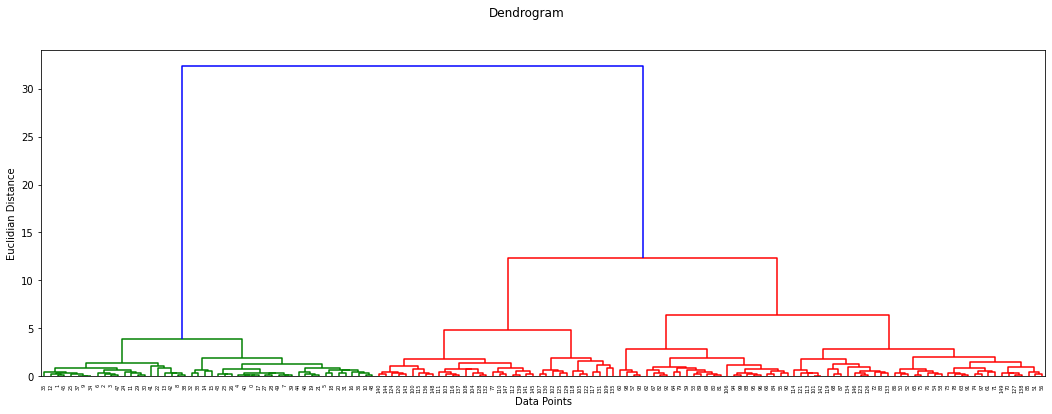

In [26]:
features = df.drop(['Id' ,'Species'] ,axis = 1)

merg = linkage(features ,method = 'ward')
plt.figure(figsize=(18 ,6))
dendrogram(merg)
plt.xlabel('Data Points')
plt.ylabel('Euclidian Distance')
plt.suptitle('Dendrogram')
plt.show()

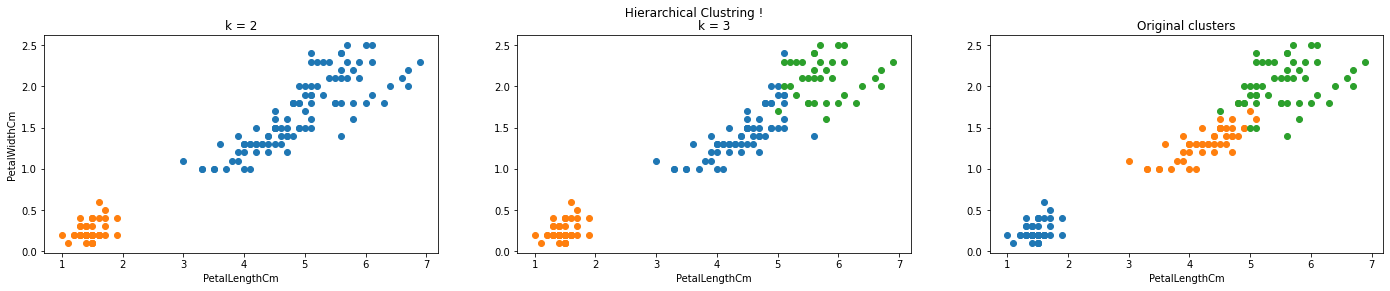

In [28]:
plt.figure(figsize=(24,4))
plt.suptitle(' Hierarchical Clustring !')

plt.subplot(1 ,3 ,1)
plt.title('k = 2')
hc = AgglomerativeClustering(n_clusters=2)
features['Labels'] = hc.fit_predict(features)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.scatter(features.PetalLengthCm[features.Labels == 0] ,features.PetalWidthCm[features.Labels == 0])
plt.scatter(features.PetalLengthCm[features.Labels == 1] ,features.PetalWidthCm[features.Labels == 1])

plt.subplot(1 ,3 ,2)
plt.title('k = 3')
plt.xlabel('PetalLengthCm')
hc = AgglomerativeClustering(n_clusters=3)
features.drop(['Labels'] ,axis = 1)
features['Labels'] = hc.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.Labels == 0] ,features.PetalWidthCm[features.Labels == 0])
plt.scatter(features.PetalLengthCm[features.Labels == 1] ,features.PetalWidthCm[features.Labels == 1])
plt.scatter(features.PetalLengthCm[features.Labels == 2] ,features.PetalWidthCm[features.Labels == 2])

plt.subplot(1 ,3 ,3) 
plt.title('Original clusters')
plt.xlabel('PetalLengthCm')
features.drop(['Labels'] ,axis = 1)
plt.scatter(df.PetalLengthCm[df.Species == "Iris-setosa"],df.PetalWidthCm[df.Species == "Iris-setosa"])
plt.scatter(df.PetalLengthCm[df.Species == "Iris-versicolor"],df.PetalWidthCm[df.Species == "Iris-versicolor"])
plt.scatter(df.PetalLengthCm[df.Species == "Iris-virginica"],df.PetalWidthCm[df.Species == "Iris-virginica"])

plt.show()

### Again our double checking shows us that three is the optimal number of clusters descriping our iris dataset !

# Evaluating Our Results ..

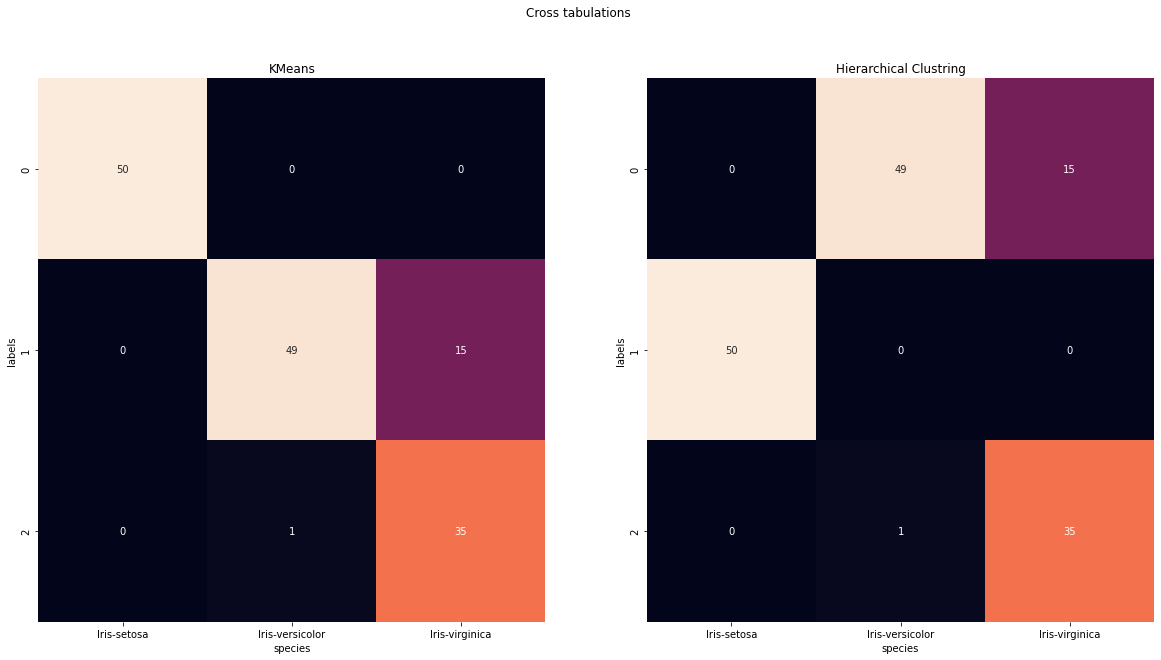

In [34]:
features.drop(['Labels'] ,axis = 1)

# Kmeans
km = KMeans(n_clusters=3)
km_predict = km.fit_predict(features)

df1 = pd.DataFrame({'labels' : km_predict ,'species' : df.Species})
ct1 = pd.crosstab(df1.labels ,df1.species)

# Hierarchy
hc = AgglomerativeClustering(n_clusters=3)
hc_predict = hc.fit_predict(features)

df2 = pd.DataFrame({'labels' : hc_predict ,'species' : df.Species})
ct2 = pd.crosstab(df2.labels ,df2.species)

plt.figure(figsize=(20 ,10))
plt.suptitle("Cross tabulations")

plt.subplot(1 ,2 ,1)
plt.title("KMeans")
sns.heatmap(ct1 ,annot = True ,cbar=False)

plt.subplot(1 ,2 ,2)
plt.title("Hierarchical Clustring")
sns.heatmap(ct2 ,annot = True ,cbar=False)

plt.show()

#### Both Failed on 16 data points over 150 data points, which is equal to 90%
#### We also see that clustering "iris-setosa" was easy for both of them (50/50 success) because it's data points are all easily differentiable